# Working with relational databases

## Bike Stores Data

The following script is used to analayze linked tables. 
Data are taken from: https://www.kaggle.com/datasets/dillonmyrick/bike-store-sample-database/data
Data are displayed in 9 different tables.

# 1. Import libraries, connect to the database and read the data

In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

In [73]:
!pip install mysql-connector-python

   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.1 MB 6.7 MB/s eta 0:00:03
   ----- ---------------------------------- 2.1/16.1 MB 5.6 MB/s eta 0:00:03
   -------- ------------------------------- 3.4/16.1 MB 5.6 MB/s eta 0:00:03
   ----------- ---------------------------- 4.5/16.1 MB 5.5 MB/s eta 0:00:03
   ------------- -------------------------- 5.5/16.1 MB 5.4 MB/s eta 0:00:02
   ---------------- ----------------------- 6.6/16.1 MB 5.4 MB/s eta 0:00:02
   ------------------ --------------------- 7.6/16.1 MB 5.4 MB/s eta 0:00:02
   ---------------------- ----------------- 8.9/16.1 MB 5.4 MB/s eta 0:00:02
   ------------------------ --------------- 10.0/16.1 MB 5.4 MB/s eta 0:00:02
   ---------------------------- ----------- 11.3/16.1 MB 5.4 MB/s eta 0:00:01
   ------------------------------ --------- 12.3/16.1 MB 5.4 MB/s eta 0:00:01
   --------------------------------- ------ 13.6/16.1 MB 5.4 MB/s eta 0:00:01
  

In [3]:
import mysql.connector

In [104]:
try:
    conn = mysql.connector.connect(
        host="localhost",
        user="root",
        password="*********",
        database="bikes"
    )
    print("Connection successful!")
except mysql.connector.Error as err:
    print(f"Error: {err}")

Connection successful!


In [106]:
cursor = conn.cursor()

In [9]:
type(conn)

mysql.connector.connection_cext.CMySQLConnection

## Connection to the database complete
## Read the data

In [11]:
customers = pd.read_sql("SELECT * FROM customers", conn)
orders = pd.read_sql("SELECT * FROM orders", conn)
order_items = pd.read_sql("SELECT * FROM order_items", conn)
products = pd.read_sql("SELECT * FROM products", conn)
staffs = pd.read_sql("SELECT * FROM staffs", conn)
stores = pd.read_sql("SELECT * FROM stores", conn)
stocks = pd.read_sql("SELECT * FROM stocks", conn)
brands = pd.read_sql("SELECT * FROM brands", conn)
categories = pd.read_sql("SELECT * FROM categories", conn)

In [12]:
print("------------------------------------Customers------------------------------------")
print(customers.head())
print("------------------------------------Orders------------------------------------")
print(orders.head())
print("------------------------------------Items------------------------------------")
print(order_items.head())
print("------------------------------------Staff------------------------------------")
print(staffs.head())
print("------------------------------------Products------------------------------------")
print(products.head())
print("------------------------------------Stores------------------------------------")
print(stores.head())
print("------------------------------------Stocks------------------------------------")
print(stocks.head())
print("------------------------------------Categories------------------------------------")
print(categories.head())

------------------------------------Customers------------------------------------
   customer_id  first_name last_name           phone                    email  \
0            1       Debra     Burks            None    debra.burks@yahoo.com   
1            2       Kasha      Todd            None     kasha.todd@yahoo.com   
2            3      Tameka    Fisher            None    tameka.fisher@aol.com   
3            4       Daryl    Spence            None     daryl.spence@aol.com   
4            5  Charolette      Rice  (916) 381-6003  charolette.rice@msn.com   

                  street           city state  zip_code  
0      9273 Thorne Ave.    Orchard Park    NY     14127  
1       910 Vine Street        Campbell    CA     95008  
2  769C Honey Creek St.   Redondo Beach    CA     90278  
3        988 Pearl Lane       Uniondale    NY     11553  
4         107 River Dr.      Sacramento    CA     95820  
------------------------------------Orders------------------------------------
   o

## Data are imported properly

In [127]:
# Function to execute SQL queries and return Dataframes
def execute_sql(query):
    cursor.execute(query)
    columns = [desc[0] for desc in cursor.description]
    return pd.DataFrame(cursor.fetchall(), columns=columns)

In [17]:
customers_df = execute_sql("SELECT * FROM customers")
print("Customers Table:")
customers_df.head()

Customers Table:


,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1,2,Kasha,Todd,None,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008
2,3,Tameka,Fisher,None,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278
3,4,Daryl,Spence,None,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820


In [19]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  1445 non-null   int64 
 1   first_name   1445 non-null   object
 2   last_name    1445 non-null   object
 3   phone        178 non-null    object
 4   email        1445 non-null   object
 5   street       1445 non-null   object
 6   city         1445 non-null   object
 7   state        1445 non-null   object
 8   zip_code     1445 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 101.7+ KB


## The table customers contain 8 different columns with the column phone having mostly null values.
-> Create a function that can clean the data

In [130]:
def clean_dataframe(df):
    threshold = len(df) * 0.5  # Calculate the threshold for 50% missing values
    df = df.dropna(thresh=threshold, axis=1) #Drop columns that contain more than 50% missing values
    df = df.drop_duplicates() #drop duplicate entries
    df = df.fillna(np.nan) # fill missing values with NaN
    return df

In [132]:
dataframes = {
    "customers": customers,
    "stores": stores,
    "staffs": staffs,
    "stocks": stocks,
    "products": products,
    "orders": orders,
    "order_items": order_items,
    "categories": categories,
}

cleaned_dataframes = {name: clean_dataframe(df.copy()) for name, df in dataframes.items()}


In [136]:
cleaned_dataframes["customers"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  1445 non-null   int64 
 1   first_name   1445 non-null   object
 2   last_name    1445 non-null   object
 3   email        1445 non-null   object
 4   street       1445 non-null   object
 5   city         1445 non-null   object
 6   state        1445 non-null   object
 7   zip_code     1445 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 90.4+ KB


## column phone was dropped

In [139]:
cleaned_dataframes["orders"].head()

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6


# 2. Perform exploratoy data analysis (EDA)
## a. What are the monthly sales of all stores ?
- Split the date column into month and year and build the product of list_price and quantity
- Join the tables orders and order_id to extract the required information

In [142]:
order_items.head()

,order_id,item_id,product_id,quantity,list_price,discount
0,1,1,20,1,599.99,0.20
1,1,2,8,2,1799.99,0.07
2,1,3,10,2,1549.00,0.05
3,1,4,16,2,599.99,0.05
4,1,5,4,1,2899.99,0.20


In [144]:
orders.head()

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6


In [146]:
monthly_sales = execute_sql("""
    SELECT YEAR(order_date) AS year, MONTH(order_date) AS month, SUM(quantity * list_price) AS total_sales
    FROM orders 
    JOIN order_items ON orders.order_id = order_items.order_id
    GROUP BY year, month
    ORDER BY year, month;
""")
print("\nMonthly Sales Trends:\n", monthly_sales)


Monthly Sales Trends:
     year  month  total_sales
0   2016      1    241184.15
1   2016      2    175768.10
2   2016      3    202157.14
3   2016      4    187223.55
4   2016      5    228701.13
5   2016      6    231120.29
6   2016      7    222854.21
7   2016      8    253130.83
8   2016      9    303282.61
9   2016     10    235051.79
10  2016     11    205315.47
11  2016     12    223695.20
12  2017      1    316954.77
13  2017      2    348740.47
14  2017      3    348177.13
15  2017      4    254105.57
16  2017      5    297754.66
17  2017      6    419892.07
18  2017      7    255727.63
19  2017      8    322553.32
20  2017      9    329388.68
21  2017     10    345316.18
22  2017     11    315881.67
23  2017     12    291022.87
24  2018      1    426301.72
25  2018      2    223941.44
26  2018      3    406701.20
27  2018      4    909179.47
28  2018      6       209.99
29  2018      7     12949.89
30  2018      8     10256.91
31  2018      9      9949.96
32  2018     10    

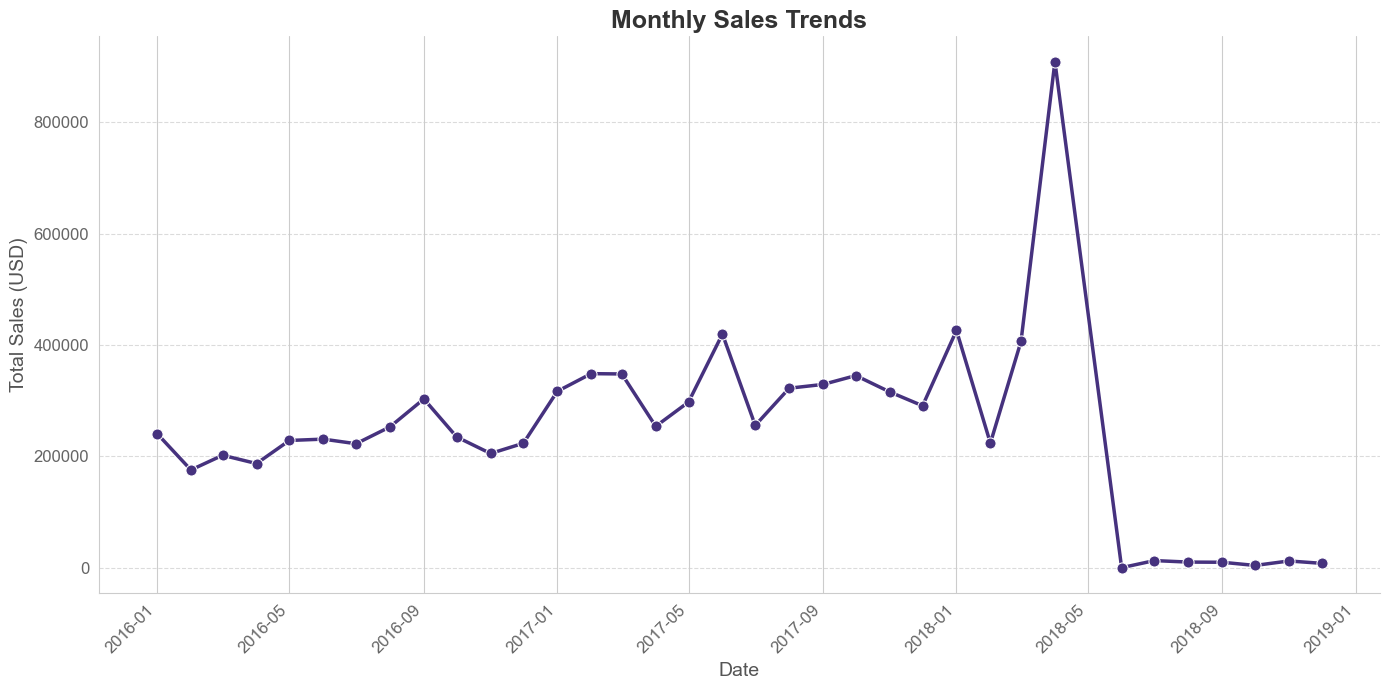

In [152]:
plt.figure(figsize=(14, 7))
monthly_sales['date'] = pd.to_datetime(monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str), format='%Y-%m')

sns.set_style("whitegrid")
sns.set_palette("viridis")

ax = sns.lineplot(x='date', y='total_sales', data=monthly_sales, linewidth=2.5, marker='o', markersize=8, color=sns.color_palette("viridis")[0])

plt.title('Monthly Sales Trends', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Date', fontsize=14, color='#555555')
plt.ylabel('Total Sales (USD)', fontsize=14, color='#555555')
plt.xticks(rotation=45, ha='right', fontsize=12, color='#666666')
plt.yticks(fontsize=12, color='#666666')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


There was a large peak in the sales in the early months of 2018.

## b. What is the best selling store?
Join the tables orders and order_items as well as stores

In [157]:
# Sales by Store:
store_sales = execute_sql("""
    SELECT stores.store_name, SUM(quantity * list_price) AS total_sales
    FROM orders JOIN order_items ON orders.order_id = order_items.order_id JOIN stores ON orders.store_id = stores.store_id
    GROUP BY stores.store_name
    ORDER BY total_sales DESC;
""")
print("\nSales by Store:\n", store_sales)


Sales by Store:
          store_name  total_sales
0     Baldwin Bikes   5826242.21
1  Santa Cruz Bikes   1790145.91
2     Rowlett Bikes    962600.76


## Baldwin Bikes is the best selling store

## c. Which products sell the best?
- Join the tables products and order_items

In [160]:
# Product Performance:
top_products = execute_sql("""
    SELECT products.product_name, SUM(quantity) AS total_quantity_sold
    FROM order_items JOIN products ON order_items.product_id = products.product_id
    GROUP BY products.product_name
    ORDER BY total_quantity_sold DESC LIMIT 10;
""")
print("\nTop Selling Products:\n", top_products)


Top Selling Products:
                                     product_name total_quantity_sold
0             Electra Cruiser 1 (24-Inch) - 2016                 296
1           Electra Townie Original 7D EQ - 2016                 290
2             Electra Townie Original 21D - 2016                 289
3  Electra Girl's Hawaii 1 (16-inch) - 2015/2016                 269
4          Surly Ice Cream Truck Frameset - 2016                 167
5                       Trek Slash 8 27.5 - 2016                 154
6  Electra Girl's Hawaii 1 (20-inch) - 2015/2016                 154
7                    Surly Straggler 650b - 2016                 151
8         Electra Townie Original 7D - 2015/2016                 148
9                         Surly Straggler - 2016                 147


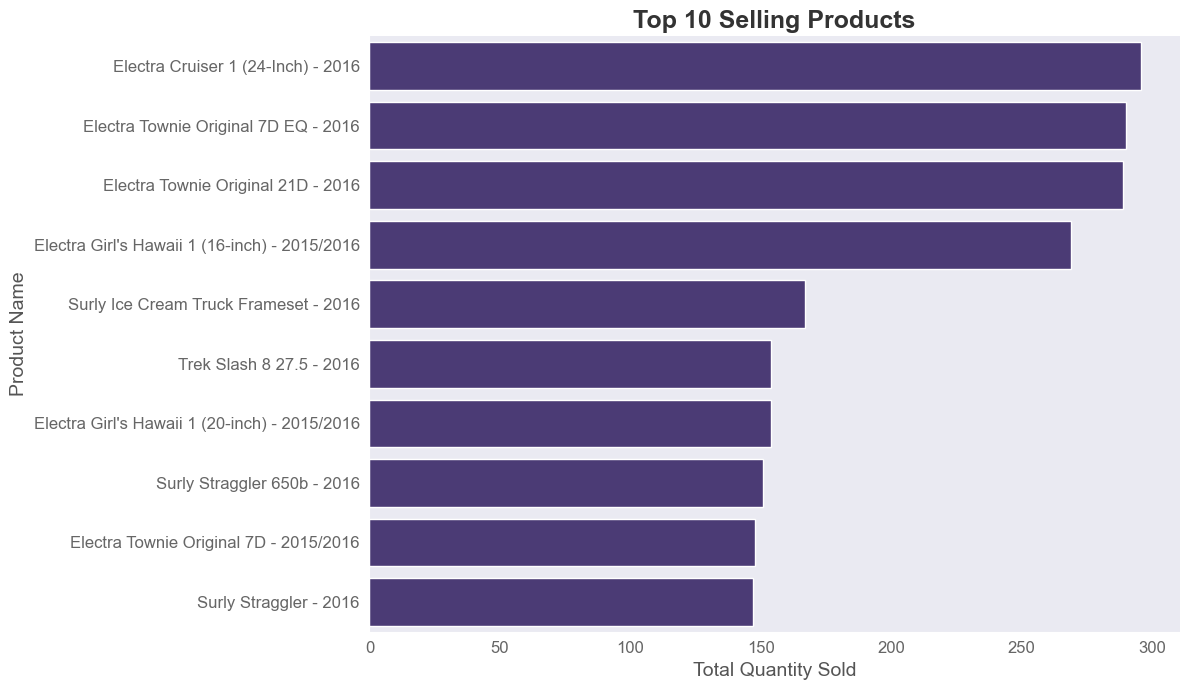

In [178]:
plt.figure(figsize=(12, 7))

sns.set_style("dark")
sns.set_palette("flare")

ax = sns.barplot(x='total_quantity_sold', y='product_name', data=top_products, color=sns.color_palette("viridis")[0])

plt.title('Top 10 Selling Products', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Total Quantity Sold', fontsize=14, color='#555555')
plt.ylabel('Product Name', fontsize=14, color='#555555')
plt.xticks(fontsize=12, color='#666666')
plt.yticks(fontsize=12, color='#666666')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## d. Who are the Top10 customers?
- Join the tables orders and order_items on the order_id
- Join orders and customers on the customer_id

In [181]:
top_customers = execute_sql("""
    SELECT customers.customer_id, customers.first_name, customers.last_name, SUM(quantity * list_price) AS total_spending
    FROM orders 
    JOIN order_items ON orders.order_id = order_items.order_id 
    JOIN customers ON orders.customer_id = customers.customer_id
    GROUP BY customers.customer_id, customers.first_name, customers.last_name
    ORDER BY total_spending DESC LIMIT 10;
""")
print("\nTop Spending Customers:\n", top_customers)


Top Spending Customers:
    customer_id first_name last_name  total_spending
0           10    Pamelia    Newman        37801.84
1           75       Abby    Gamble        37500.89
2           94     Sharyn   Hopkins        37138.86
3            6    Lyndsey      Bean        35857.86
4           16     Emmitt   Sanchez        34503.82
5           73    Melanie     Hayes        34390.88
6            1      Debra     Burks        30645.87
7           61    Elinore   Aguilar        29661.83
8           93    Corrina    Sawyer        29214.89
9          122      Shena    Carter        27618.95


## e. Which products need to be filled back up?
- Join the tables stocks and products on the product_id and check the quantity
- Join stocks and stores to see where the product needs to be refilled

In [196]:
low_stock = execute_sql("""
    SELECT products.product_name, stocks.quantity, stores.store_name
    FROM stocks
    JOIN products ON stocks.product_id = products.product_id
    JOIN stores ON stocks.store_id = stores.store_id
    WHERE stocks.quantity < 10;
""")
print("\nLow Stock Products:\n", low_stock)


Low Stock Products:
                                  product_name  quantity        store_name
0          Ritchey Timberwolf Frameset - 2016         5  Santa Cruz Bikes
1             Surly Wednesday Frameset - 2016         0     Rowlett Bikes
2             Surly Wednesday Frameset - 2016         6  Santa Cruz Bikes
3                    Trek Fuel EX 8 29 - 2016         2     Baldwin Bikes
4                Heller Shagamaw Frame - 2016         3     Rowlett Bikes
..                                        ...       ...               ...
318         Electra Townie Commute 27D - 2018         7  Santa Cruz Bikes
319  Electra Townie Commute 27D Ladies - 2018         8     Rowlett Bikes
320  Electra Townie Commute 27D Ladies - 2018         5     Baldwin Bikes
321  Electra Townie Commute 8D Ladies' - 2018         2     Baldwin Bikes
322  Electra Townie Original 1 Ladies' - 2018         0     Rowlett Bikes

[323 rows x 3 columns]


## f. Which products are available at the moment?
- Join stocks with stores and products to see, which are available

In [202]:
product_availability = execute_sql("""
    SELECT stores.store_name, products.product_name
    FROM stocks 
    JOIN products ON stocks.product_id = products.product_id 
    JOIN stores ON stocks.store_id = stores.store_id
    WHERE stocks.quantity > 0;
""")
print("\nProduct Availability:\n", product_availability)


Product Availability:
            store_name                              product_name
0       Rowlett Bikes                           Trek 820 - 2016
1       Baldwin Bikes                           Trek 820 - 2016
2    Santa Cruz Bikes                           Trek 820 - 2016
3       Rowlett Bikes        Ritchey Timberwolf Frameset - 2016
4       Baldwin Bikes        Ritchey Timberwolf Frameset - 2016
..                ...                                       ...
909     Rowlett Bikes  Electra Townie Commute 8D Ladies' - 2018
910     Baldwin Bikes  Electra Townie Commute 8D Ladies' - 2018
911  Santa Cruz Bikes  Electra Townie Commute 8D Ladies' - 2018
912     Baldwin Bikes  Electra Townie Original 1 Ladies' - 2018
913  Santa Cruz Bikes  Electra Townie Original 1 Ladies' - 2018

[914 rows x 2 columns]


## g. Where to most customers come from?

In [205]:
customer_states = execute_sql("""
    SELECT state, COUNT(*) AS customer_count
    FROM customers
    GROUP BY state;
""")
print("\nCustomer Distribution by State:\n", customer_states)


Customer Distribution by State:
   state  customer_count
0    NY            1019
1    CA             284
2    TX             142


## h. Which brand name is the most sold?
- Join order_items with products and brands
- sort by the total_quantity for each brand

In [209]:
popular_brands = execute_sql("""
    SELECT brands.brand_name, SUM(quantity) AS total_quantity
    FROM order_items JOIN products ON order_items.product_id = products.product_id JOIN brands ON products.brand_id = brands.brand_id
    GROUP BY brands.brand_name
    ORDER BY total_quantity DESC;
""")
print("\nPopular Brands:\n", popular_brands)


Popular Brands:
      brand_name total_quantity
0       Electra           2612
1          Trek           1839
2         Surly            908
3  Sun Bicycles            731
4   Pure Cycles            376
5          Haro            331
6        Heller            138
7       Ritchey            118
8       Strider             25


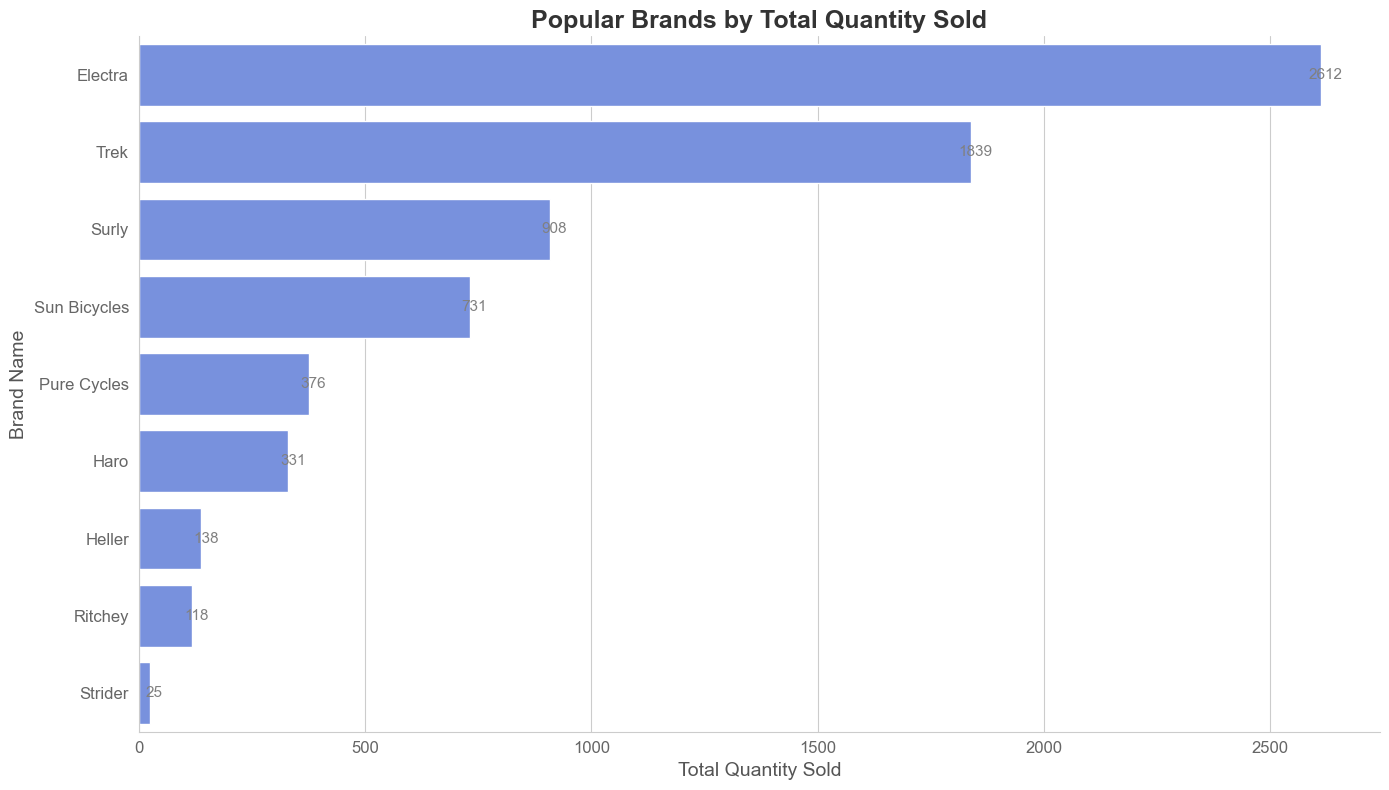

In [211]:
plt.figure(figsize=(14, 8))

sns.set_style("whitegrid")
sns.set_palette("coolwarm")  # Using 'coolwarm' for a different color palette

ax = sns.barplot(x='total_quantity', y='brand_name', data=popular_brands)

plt.title('Popular Brands by Total Quantity Sold', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Total Quantity Sold', fontsize=14, color='#555555')
plt.ylabel('Brand Name', fontsize=14, color='#555555')
plt.xticks(fontsize=12, color='#666666')
plt.yticks(fontsize=12, color='#666666')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add annotations for the values on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=11, color='gray')

plt.tight_layout()
plt.show()

## i. What is the average price for each category?


In [214]:
category_avg_price = execute_sql("""
    SELECT categories.category_name, AVG(products.list_price) AS average_price
    FROM products JOIN categories ON products.category_id = categories.category_id
    GROUP BY categories.category_name;
""")
print("\nAverage Price per Category:\n", category_avg_price)


Average Price per Category:
          category_name  average_price
0       Mountain Bikes    1649.757333
1       Electric Bikes    3281.656667
2  Cyclocross Bicycles    2542.793000
3    Cruisers Bicycles     730.412308
4    Children Bicycles     287.786610
5     Comfort Bicycles     682.123333
6           Road Bikes    3175.357333


## Electric Bikes are the most expensive, while children bicycles are the cheapest

In [61]:
orders_customers_stores_df = execute_sql("""
    SELECT o.*, c.first_name AS customer_first_name, c.last_name AS customer_last_name, s.store_name
    FROM orders o
    JOIN customers c ON o.customer_id = c.customer_id
    JOIN stores s ON o.store_id = s.store_id
""")
print("\nJoined Orders, Customers, and Stores:")
print(orders_customers_stores_df.head())


Joined Orders, Customers, and Stores:
   order_id  customer_id  order_status  order_date required_date shipped_date  \
0      1613            1             3  2018-11-18    2018-11-18         None   
1      1555            1             1  2018-04-18    2018-04-18         None   
2       599            1             4  2016-12-09    2016-12-10   2016-12-12   
3      1509            2             1  2018-04-09    2018-04-09         None   
4      1084            2             4  2017-08-21    2017-08-24   2017-08-23   

   store_id  staff_id customer_first_name customer_last_name        store_name  
0         2         6               Debra              Burks     Baldwin Bikes  
1         2         7               Debra              Burks     Baldwin Bikes  
2         2         6               Debra              Burks     Baldwin Bikes  
3         1         3               Kasha               Todd  Santa Cruz Bikes  
4         1         2               Kasha               Todd  Santa C

In [63]:
cleaned_orders_customers_stores_df = clean_dataframe(orders_customers_stores_df.copy())

In [65]:
cleaned_orders_customers_stores_df.head()

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id,customer_first_name,customer_last_name,store_name
0,1613,1,3,2018-11-18,2018-11-18,NaN,2,6,Debra,Burks,Baldwin Bikes
1,1555,1,1,2018-04-18,2018-04-18,NaN,2,7,Debra,Burks,Baldwin Bikes
2,599,1,4,2016-12-09,2016-12-10,2016-12-12,2,6,Debra,Burks,Baldwin Bikes
3,1509,2,1,2018-04-09,2018-04-09,NaN,1,3,Kasha,Todd,Santa Cruz Bikes
4,1084,2,4,2017-08-21,2017-08-24,2017-08-23,1,2,Kasha,Todd,Santa Cruz Bikes


In [67]:
cleaned_orders_customers_stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   order_id             1615 non-null   int64 
 1   customer_id          1615 non-null   int64 
 2   order_status         1615 non-null   int64 
 3   order_date           1615 non-null   object
 4   required_date        1615 non-null   object
 5   shipped_date         1445 non-null   object
 6   store_id             1615 non-null   int64 
 7   staff_id             1615 non-null   int64 
 8   customer_first_name  1615 non-null   object
 9   customer_last_name   1615 non-null   object
 10  store_name           1615 non-null   object
dtypes: int64(5), object(6)
memory usage: 138.9+ KB


In [70]:
# Join Products, Brands, and Categories
products_brands_categories_df = execute_sql("""
    SELECT p.*, b.brand_name, c.category_name
    FROM products p
    JOIN brands b ON p.brand_id = b.brand_id
    JOIN categories c ON p.category_id = c.category_id
""")

print("\nJoined Products, Brands, and Categories:")
print(products_brands_categories_df.head())
cleaned_products_brands_categories_df = clean_dataframe(products_brands_categories_df.copy())
cleaned_products_brands_categories_df.head()
cleaned_products_brands_categories_df.info()


Joined Products, Brands, and Categories:
   product_id                        product_name  brand_id  category_id  \
0           1                     Trek 820 - 2016         9            6   
1           2  Ritchey Timberwolf Frameset - 2016         5            6   
2           3     Surly Wednesday Frameset - 2016         8            6   
3           4            Trek Fuel EX 8 29 - 2016         9            6   
4           5        Heller Shagamaw Frame - 2016         3            6   

   model_year  list_price brand_name   category_name  
0        2016      379.99       Trek  Mountain Bikes  
1        2016      749.99    Ritchey  Mountain Bikes  
2        2016      999.99      Surly  Mountain Bikes  
3        2016     2899.99       Trek  Mountain Bikes  
4        2016     1320.99     Heller  Mountain Bikes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         ---

In [71]:
# Join Order Items and Products
order_items_products_df = execute_sql("""
    SELECT oi.*, p.product_name, p.list_price
    FROM order_items oi
    JOIN products p ON oi.product_id = p.product_id
""")

print("\nJoined Order Items and Products:")
print(order_items_products_df.head())
cleaned_order_items_products_df = clean_dataframe(order_items_products_df.copy())


Joined Order Items and Products:
   order_id  item_id  product_id  quantity  list_price  discount  \
0         1        1          20         1      599.99      0.20   
1         1        2           8         2     1799.99      0.07   
2         1        3          10         2     1549.00      0.05   
3         1        4          16         2      599.99      0.05   
4         1        5           4         1     2899.99      0.20   

                                     product_name  list_price  
0  Electra Townie Original 7D EQ - Women's - 2016      599.99  
1           Trek Remedy 29 Carbon Frameset - 2016     1799.99  
2                          Surly Straggler - 2016     1549.00  
3            Electra Townie Original 7D EQ - 2016      599.99  
4                        Trek Fuel EX 8 29 - 2016     2899.99  


In [74]:
cleaned_order_items_products_df.head()

,order_id,item_id,product_id,quantity,list_price,discount,product_name,list_price
0,1,1,20,1,599.99,0.20,Electra Townie Original 7D EQ - Women's - 2016,599.99
1,1,2,8,2,1799.99,0.07,Trek Remedy 29 Carbon Frameset - 2016,1799.99
2,1,3,10,2,1549.00,0.05,Surly Straggler - 2016,1549.00
3,1,4,16,2,599.99,0.05,Electra Townie Original 7D EQ - 2016,599.99
4,1,5,4,1,2899.99,0.20,Trek Fuel EX 8 29 - 2016,2899.99


In [75]:
# Join Orders, Order Items, and Products
orders_order_items_products_df = execute_sql("""
    SELECT o.*, oi.*, p.product_name, p.list_price
    FROM orders o
    JOIN order_items oi ON o.order_id = oi.order_id
    JOIN products p ON oi.product_id = p.product_id
""")

print("\nJoined Orders, Order Items, and Products:")
print(orders_order_items_products_df.head())


Joined Orders, Order Items, and Products:
   order_id  customer_id  order_status  order_date required_date shipped_date  \
0         1          259             4  2016-01-01    2016-01-03   2016-01-03   
1         1          259             4  2016-01-01    2016-01-03   2016-01-03   
2         1          259             4  2016-01-01    2016-01-03   2016-01-03   
3         1          259             4  2016-01-01    2016-01-03   2016-01-03   
4         1          259             4  2016-01-01    2016-01-03   2016-01-03   

   store_id  staff_id  order_id  item_id  product_id  quantity  list_price  \
0         1         2         1        5           4         1     2899.99   
1         1         2         1        4          16         2      599.99   
2         1         2         1        3          10         2     1549.00   
3         1         2         1        2           8         2     1799.99   
4         1         2         1        1          20         1      599.99   

 

In [77]:
cleaned_orders_order_items_products_df = clean_dataframe(orders_order_items_products_df.copy())
cleaned_orders_order_items_products_df.head()

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id,order_id,item_id,product_id,quantity,list_price,discount,product_name,list_price
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2,1,5,4,1,2899.99,0.20,Trek Fuel EX 8 29 - 2016,2899.99
1,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2,1,4,16,2,599.99,0.05,Electra Townie Original 7D EQ - 2016,599.99
2,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2,1,3,10,2,1549.00,0.05,Surly Straggler - 2016,1549.00
3,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2,1,2,8,2,1799.99,0.07,Trek Remedy 29 Carbon Frameset - 2016,1799.99
4,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2,1,1,20,1,599.99,0.20,Electra Townie Original 7D EQ - Women's - 2016,599.99


In [78]:
# Join Staff and Stores.
staff_stores_df = execute_sql("""
    SELECT st.*, s.store_name
    FROM staffs st
    JOIN stores s ON st.store_id = s.store_id
""")

print("\nJoined Staff and Stores:")
print(staff_stores_df.head())


Joined Staff and Stores:
   staff_id first_name last_name                       email           phone  \
0         1    Fabiola   Jackson  fabiola.jackson@bikes.shop  (831) 555-5554   
1         2     Mireya  Copeland  mireya.copeland@bikes.shop  (831) 555-5555   
2         3      Genna   Serrano    genna.serrano@bikes.shop  (831) 555-5556   
3         4     Virgie   Wiggins   virgie.wiggins@bikes.shop  (831) 555-5557   
4         5   Jannette     David   jannette.david@bikes.shop  (516) 379-4444   

   active  store_id manager_id        store_name  
0       1         1       None  Santa Cruz Bikes  
1       1         1          1  Santa Cruz Bikes  
2       1         1          2  Santa Cruz Bikes  
3       1         1          2  Santa Cruz Bikes  
4       1         2          1     Baldwin Bikes  


In [80]:
cleaned_staff_stores_df = clean_dataframe(staff_stores_df.copy())
cleaned_staff_stores_df.head()

,staff_id,first_name,last_name,email,phone,active,store_id,manager_id,store_name
0,1,Fabiola,Jackson,fabiola.jackson@bikes.shop,(831) 555-5554,1,1,NaN,Santa Cruz Bikes
1,2,Mireya,Copeland,mireya.copeland@bikes.shop,(831) 555-5555,1,1,1,Santa Cruz Bikes
2,3,Genna,Serrano,genna.serrano@bikes.shop,(831) 555-5556,1,1,2,Santa Cruz Bikes
3,4,Virgie,Wiggins,virgie.wiggins@bikes.shop,(831) 555-5557,1,1,2,Santa Cruz Bikes
4,5,Jannette,David,jannette.david@bikes.shop,(516) 379-4444,1,2,1,Baldwin Bikes


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
sns.set_style("dark")  # Set a clean style
sns.set_palette("flare")  # Use a nice color palette

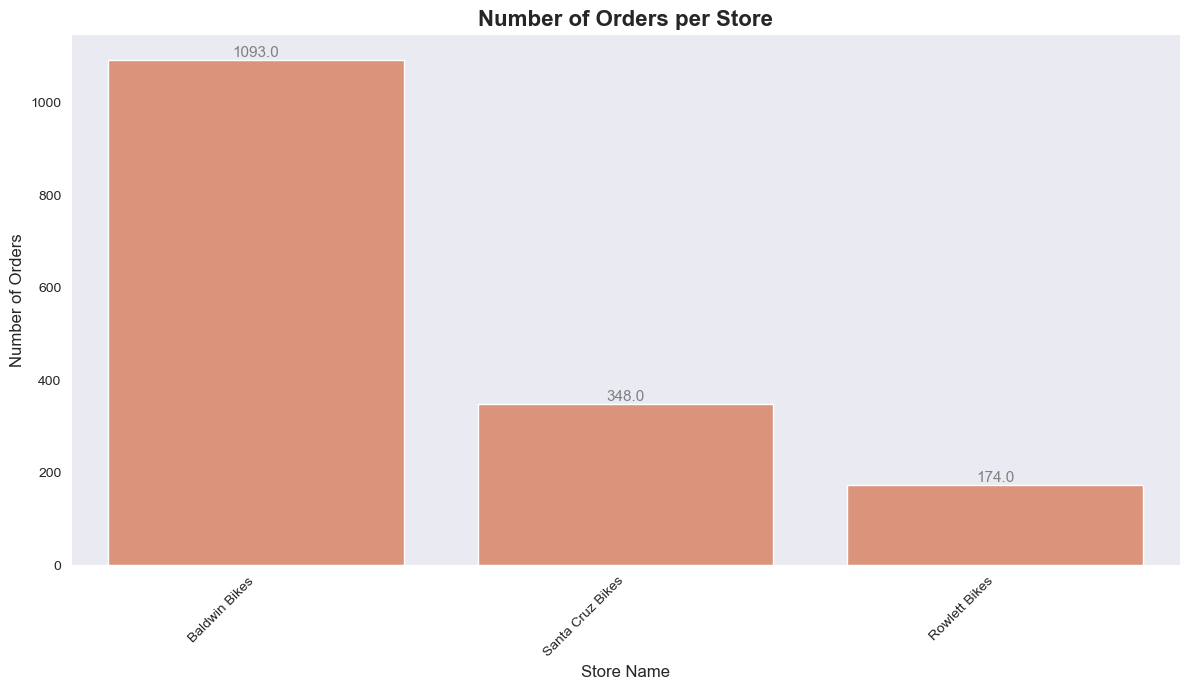

In [87]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=cleaned_orders_customers_stores_df, x='store_name', order=cleaned_orders_customers_stores_df['store_name'].value_counts().index)
plt.title('Number of Orders per Store', fontsize=16, fontweight='bold')
plt.xlabel('Store Name', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()

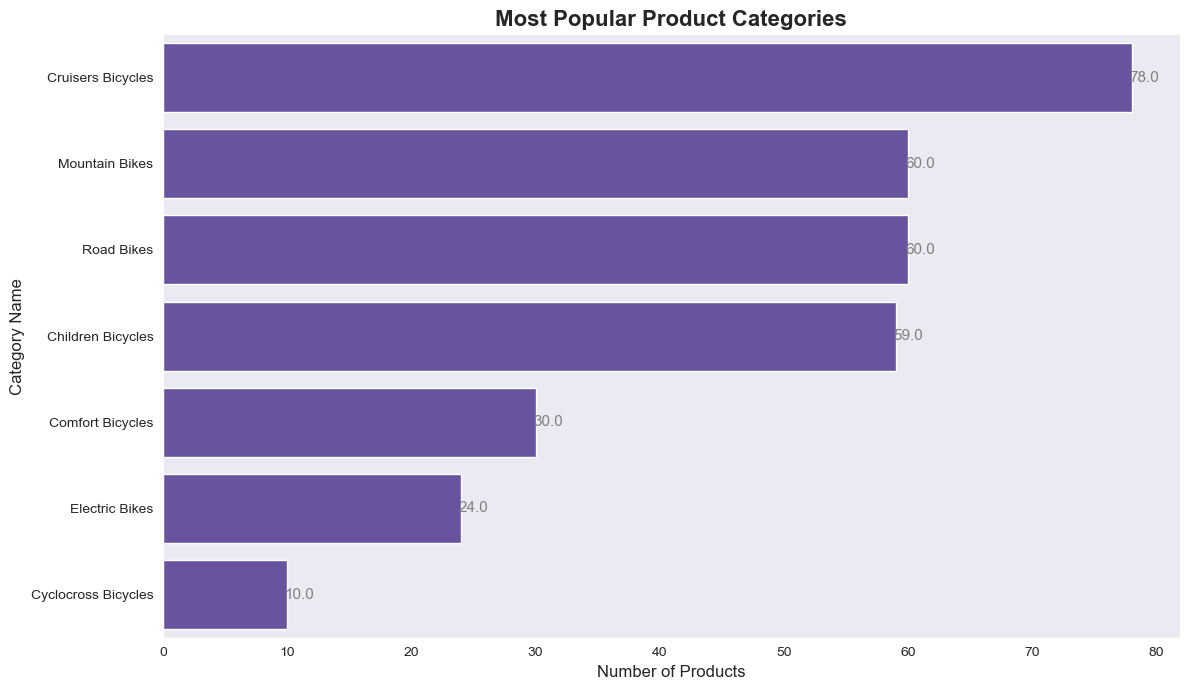

In [89]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=cleaned_products_brands_categories_df, y='category_name', color = '#6247AA', order=cleaned_products_brands_categories_df['category_name'].value_counts().index)
plt.title('Most Popular Product Categories', fontsize=16, fontweight='bold')
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Category Name', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=11, color='gray')
plt.tight_layout()
plt.show()

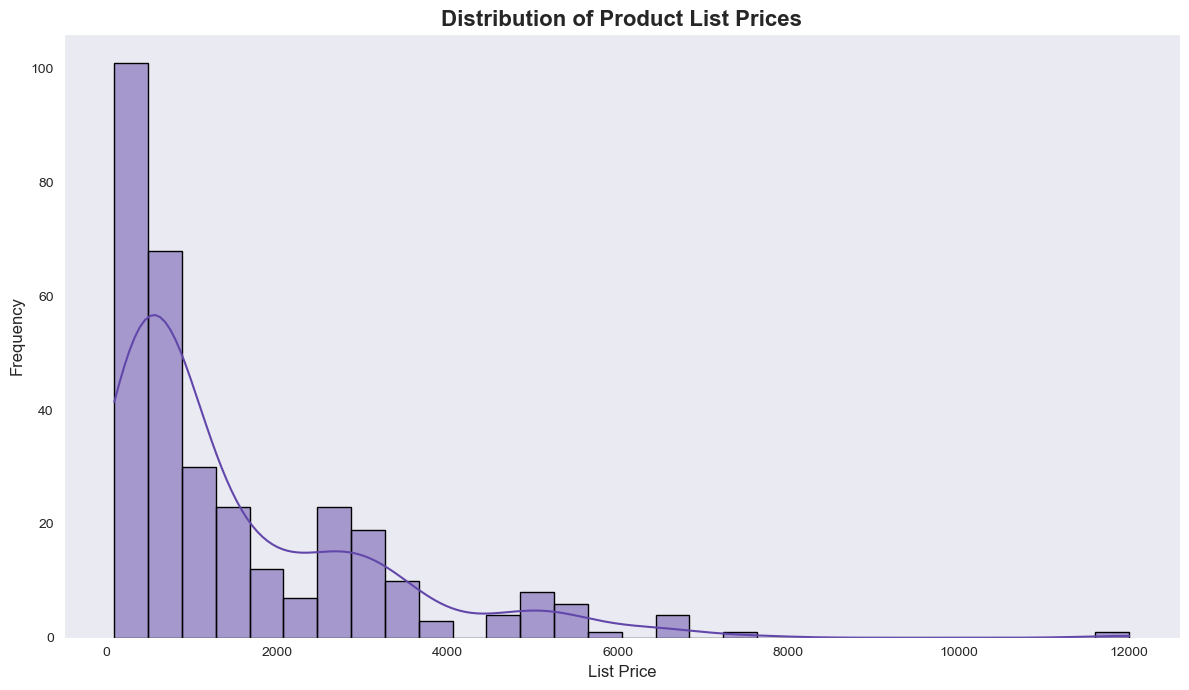

In [90]:
plt.figure(figsize=(12, 7))
sns.histplot(cleaned_products_brands_categories_df['list_price'], bins=30, kde=True, color='#6247AA', edgecolor='black')
plt.title('Distribution of Product List Prices', fontsize=16, fontweight='bold')
plt.xlabel('List Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

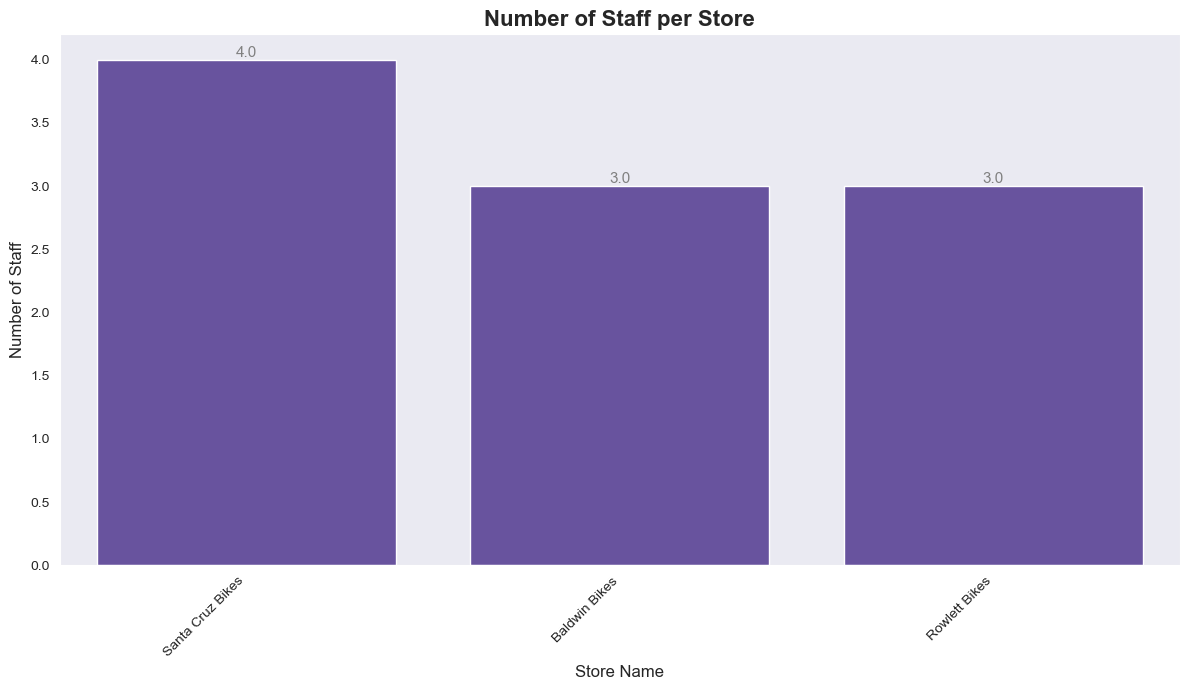

In [91]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=cleaned_staff_stores_df, x='store_name', color = '#6247AA', order=cleaned_staff_stores_df['store_name'].value_counts().index)
plt.title('Number of Staff per Store', fontsize=16, fontweight='bold')
plt.xlabel('Store Name', fontsize=12)
plt.ylabel('Number of Staff', fontsize=12)
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()

In [217]:
if conn and conn.is_connected():
    cursor.close()
    conn.close()
    print("MySQL connection closed")

MySQL connection closed
